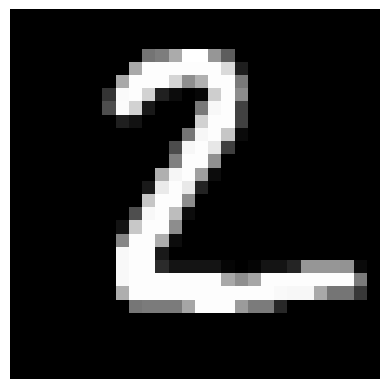

In [4]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import os
import random
import matplotlib.pyplot as plt


csv_file = r"C:\Users\Aaditya\Desktop\ipcv_pracs\data\mnist_test.csv"  # Replace with the provided file name
data = pd.read_csv(csv_file)

labels = data.iloc[:, 0]  # First column: Labels
pixels = data.iloc[:, 1:]  # Remaining columns: Pixel data

# Directory to save images
output_dir = r"C:\Users\Aaditya\Desktop\ipcv_pracs\mnist_images"
os.makedirs(output_dir, exist_ok=True)

for idx, (label, pixel_values) in enumerate(zip(labels, pixels.values)):
    image_array = pixel_values.reshape(28, 28).astype(np.uint8)
    img = Image.fromarray(image_array)
    img.save(f"{output_dir}/{label}_{idx}.png")
    if idx >= 10: 
        break


image_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(output_dir, random_image_file)
random_img = Image.open(random_image_path)


plt.imshow(random_img, cmap="gray")
plt.axis('off')  
plt.show()




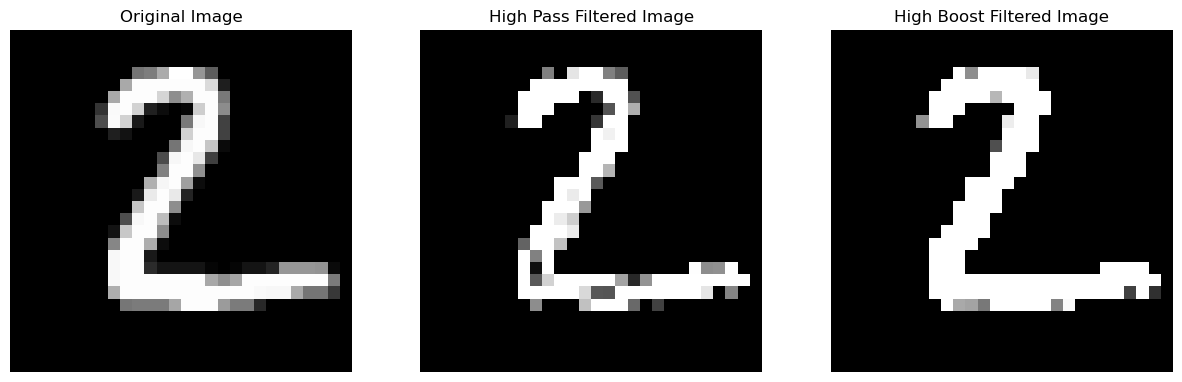

In [5]:
# Convert the random image to a numpy array for processing
random_image_array = np.array(random_img, dtype=np.float32)

# Step 3: Apply Basic High Pass Filter
def high_pass_filter(image_array):
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])  # High-pass filter kernel
    filtered_image = np.zeros_like(image_array)

    # Perform convolution without padding
    for i in range(1, image_array.shape[0] - 1):
        for j in range(1, image_array.shape[1] - 1):
            region = image_array[i-1:i+2, j-1:j+2]
            filtered_image[i, j] = np.sum(region * kernel)

    # Clip values to maintain valid intensity range
    filtered_image = np.clip(filtered_image, 0, 255)
    return filtered_image

# Apply high-pass filter
high_pass_result = high_pass_filter(random_image_array)

# Step 4: Apply Basic High Boost Filter
def high_boost_filter(image_array, boost_factor=1.5):
    kernel = np.array([[-1, -1, -1],
                       [-1,  8 + boost_factor, -1],
                       [-1, -1, -1]])  # High-boost filter kernel
    filtered_image = np.zeros_like(image_array)

    # Perform convolution without padding
    for i in range(1, image_array.shape[0] - 1):
        for j in range(1, image_array.shape[1] - 1):
            region = image_array[i-1:i+2, j-1:j+2]
            filtered_image[i, j] = np.sum(region * kernel)

    # Clip values to maintain valid intensity range
    filtered_image = np.clip(filtered_image, 0, 255)
    return filtered_image

# Apply high-boost filter
high_boost_result = high_boost_filter(random_image_array)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(random_image_array, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# High-pass filtered image
axes[1].imshow(high_pass_result, cmap="gray")
axes[1].set_title("High Pass Filtered Image")
axes[1].axis("off")

# High-boost filtered image
axes[2].imshow(high_boost_result, cmap="gray")
axes[2].set_title("High Boost Filtered Image")
axes[2].axis("off")

plt.show()
